In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
dengue_case = pd.read_csv('combined-data.csv')
cleaned_dengue_case = pd.read_csv('cleaned_dengue_data.csv')

In [5]:
cleaned_dengue_case.head()

,Year,Month_Num,Cases,RAINFALL,TMAX,TMIN,TMEAN,RH,Population_Density,Total_Population,Urban_Population,Urbanization_Rate
0,2014,1,373.0,0.4,29.5,23.4,26.4,72,2574.0,3673803.0,3261587.0,88.78
1,2014,2,131.0,3.3,31.3,24.1,27.7,73,2574.0,3673803.0,3261587.0,88.78
2,2014,3,75.0,7.2,32.5,25.4,28.9,73,2574.0,3673803.0,3261587.0,88.78
3,2014,4,57.0,1.2,35.0,26.8,30.9,72,2574.0,3673803.0,3261587.0,88.78
4,2014,5,43.0,84.5,36.3,28.3,32.3,72,2574.0,3673803.0,3261587.0,88.78


In [ ]:
S = cleaned_dengue_case['Total_Population'] - 
E = 
I = cleaned_dengue_case['Cases']
R = cleaned_dengue_case['Total_Population'] - cleaned_dengue_case['Cases']

In [ ]:
# --- 1. Read your data.csv file ---
# Assuming your CSV has 'S', 'E', 'I', 'R', and 'cases' columns.
df_data = pd.read_csv('data.csv')

# --- 2. Define the SEIR Model Equations ---
def seir_model(y, t, beta, sigma, gamma, N):
    """
    This function defines the system of ordinary differential equations (ODEs)
    for the SEIR model.
    """
    S, E, I, R = y
    dS_dt = -beta * S * I / N
    dE_dt = (beta * S * I / N) - (sigma * E)
    dI_dt = (sigma * E) - (gamma * I)
    dR_dt = gamma * I

    return [dS_dt, dE_dt, dI_dt, dR_dt]

# --- 3. Set Parameters and Initial Conditions from historical data ---
# Get the total population from the first row of your data.
N = df_data[['S', 'E', 'I', 'R']].sum(axis=1).iloc[0]

# Get the initial conditions for the forecast from the last row of your data.
last_row = df_data.iloc[-1]
S0 = last_row['S']
E0 = last_row['E']
I0 = last_row['I']
R0 = last_row['R']
y0 = [S0, E0, I0, R0]

# SEIR model parameters. In a real application, you would fit these.
# For now, we'll use assumed values.
beta = 0.5    # Infection rate
sigma = 1/5   # Incubation rate
gamma = 1/10  # Recovery rate

# --- 4. Forecast the Future (5 years = 60 months) ---
# Create a grid of time points for the forecast.
forecast_months = 5 * 12
t_forecast = np.arange(0, forecast_months, 1)

# Run the simulation for the next 5 years.
solution_forecast = odeint(seir_model, y0, t_forecast, args=(beta, sigma, gamma, N))
S_forecast, E_forecast, I_forecast, R_forecast = solution_forecast.T

# --- 5. Combine and Plot the Results ---
# Combine historical and forecasted data for a full plot.
# We will use the 'I' column from the CSV and the 'I_forecast' from the model.
I_combined = np.concatenate([df_data['I'], I_forecast])
t_combined = np.arange(len(I_combined))

plt.figure(figsize=(12, 7))
plt.plot(t_combined[:len(df_data)], I_combined[:len(df_data)], label='Historical Infected (Actual Data)', color='blue', linestyle='--')
plt.plot(t_combined[len(df_data)-1:], I_combined[len(df_data)-1:], label='Forecasted Infected (Model Output)', color='red')
plt.axvline(x=len(df_data), color='gray', linestyle=':', label='Start of Forecast')

plt.xlabel('Time (Months)')
plt.ylabel('Number of Individuals')
plt.title('SEIR Model: Historical Data and 5-Year Forecast')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

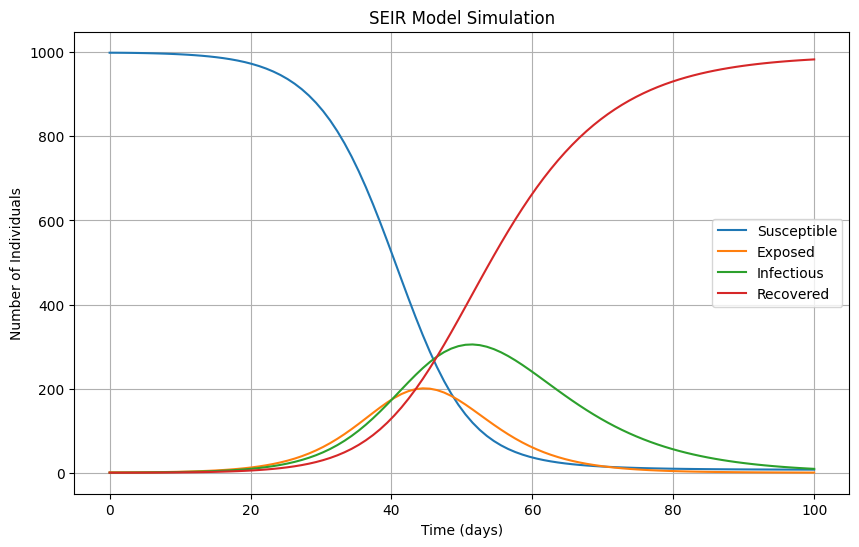

In [ ]:
# --- 1. Define the SEIR Model Equations ---
def seir_model(y, t, beta, sigma, gamma, N):
    """
    This function defines the system of ordinary differential equations (ODEs)
    for the SEIR model.

    y: A list containing the current values of S, E, I, and R.
    t: The current time.
    beta: The infection rate.
    sigma: The incubation rate.
    gamma: The recovery rate.
    N: The total population.
    """
    S, E, I, R = y
    dS_dt = -beta * S * I / N
    dE_dt = (beta * S * I / N) - (sigma * E)
    dI_dt = (sigma * E) - (gamma * I)
    dR_dt = gamma * I

    return [dS_dt, dE_dt, dI_dt, dR_dt]

# --- 2. Set the Parameters and Initial Conditions ---
# Total population
N = 1000

# Initial number of exposed (E0), infectious (I0), and recovered (R0) individuals
E0 = 1
I0 = 0
R0 = 0
S0 = N - E0 - I0 - R0  # Everyone else is susceptible

# SEIR model parameters
beta = 0.5  # Infection rate
sigma = 1/5  # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/10 # Recovery rate (1/infectious period, e.g., 10 days)

# Initial conditions for the model
y0 = [S0, E0, I0, R0]

# A grid of time points (in days)
t = np.linspace(0, 100, 100) # Simulate for 100 days

# --- 3. Run the Simulation ---
# The odeint function solves the differential equations over the time grid.
solution = odeint(seir_model, y0, t, args=(beta, sigma, gamma, N))
S, E, I, R = solution.T # Transpose the solution to get S, E, I, R as separate arrays

# --- 4. Plot the Results ---
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infectious')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title('SEIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()